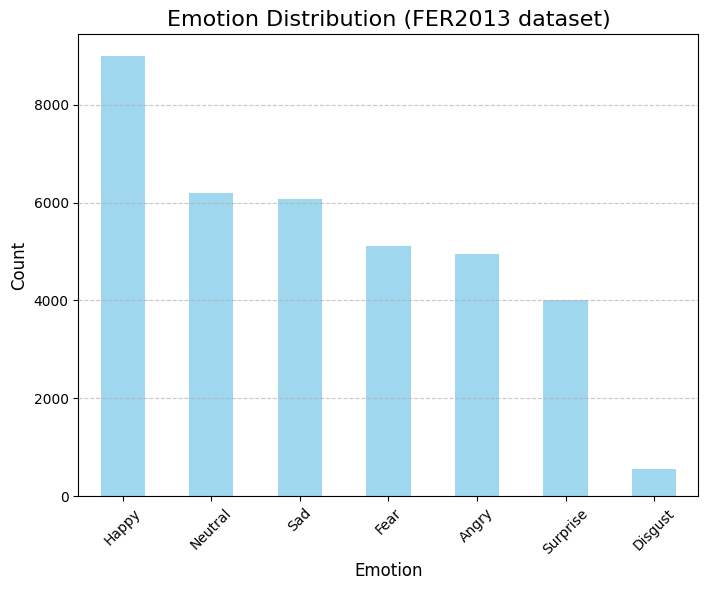

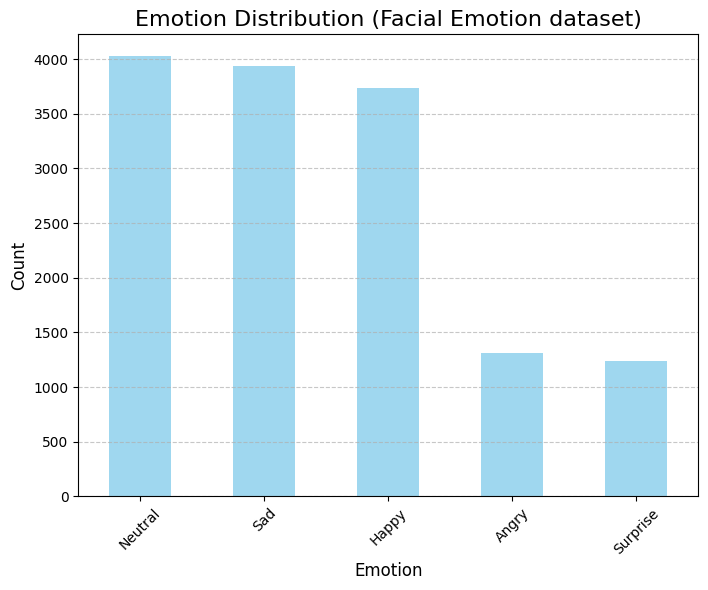

Missing Values (Facial Adjusted):
filename    0
emotion     0
label       0
dtype: int64

Missing Values (FER2013):
emotion         0
pixels          0
Usage           0
emotion_name    0
dtype: int64

Statistics (Facial Adjusted):
              label
count  14248.000000
mean       2.205081
std        1.343997
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max        4.000000

Statistics (FER2013):
            emotion
count  35887.000000
mean       3.323265
std        1.873819
min        0.000000
25%        2.000000
50%        3.000000
75%        5.000000
max        6.000000

Class Distribution (Facial Adjusted):
emotion
Neutral     4027
Sad         3934
Happy       3740
Angry       1313
Surprise    1234
Name: count, dtype: int64

Class Distribution (FER2013):
emotion
Happy       8989
Neutral     6198
Sad         6077
Fear        5121
Angry       4953
Surprise    4002
Disgust      547
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# load emotion data
zip_path = 'msba265-finalstorage/data_storage/fer2013.zip'
fer2013 = pd.read_csv(zip_path, compression='zip')
label_to_emotion = {
    0: "Angry",
    1: "Disgust",
    2: "Fear",
    3: "Happy",
    4: "Sad",
    5: "Surprise",
    6: "Neutral"
}

# convert emotion label to emotion name 
fer2013['emotion_name'] = fer2013['emotion'].map(label_to_emotion)

# count emotion 
emotion_counts = fer2013['emotion_name'].value_counts()

# plot a bar chart 
plt.figure(figsize=(8, 6))
emotion_counts.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Emotion Distribution (FER2013 dataset)', fontsize=16)
plt.xlabel('Emotion', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#load facial emotion data
fe = pd.read_csv('msba265-finalstorage/data_storage/facial_adjusted.csv')
# count emoion
emotion_counts = fe['emotion'].value_counts()

# plot a bar chart 
plt.figure(figsize=(8, 6))
emotion_counts.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Emotion Distribution (Facial Emotion dataset)', fontsize=16)
plt.xlabel('Emotion', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Data Cleaning
# Check for missing values in both datasets
facial_missing = fe.isnull().sum()
fer2013_missing = fer2013.isnull().sum()

# Drop unnecessary columns (if applicable)
fe_cleaned = fe.drop(columns=['filename'])

# Ensure data types are consistent (convert label columns to int if necessary)
fe_cleaned['label'] = fe_cleaned['label'].astype(int)
fer2013['emotion'] = fer2013['emotion'].astype(int)

# Exploratory Data Analysis 
# Basic statistics for numeric columns
facial_stats = fe_cleaned.describe()
fer2013_stats = fer2013.describe()

# Check class distribution in both datasets
facial_class_dist = fe_cleaned['emotion'].value_counts()
fer2013_class_dist = fer2013['emotion'].map({
    0: "Angry", 1: "Disgust", 2: "Fear", 3: "Happy", 4: "Sad", 5: "Surprise", 6: "Neutral"
}).value_counts()

# Normalize pixel values in fer2013 
fer2013['pixel_array'] = fer2013['pixels'].apply(lambda x: np.fromstring(x, sep=' ').astype(float))
fer2013['pixel_array_normalized'] = fer2013['pixel_array'].apply(lambda x: x / 255.0)

# Add one-hot encoding for emotion labels in both datasets
fe_cleaned = pd.get_dummies(fe_cleaned, columns=['emotion'], prefix='emotion')
fer2013_one_hot = pd.get_dummies(fer2013['emotion'], prefix='emotion')

# Print summary of cleaning and transformation
print("Missing Values (Facial Adjusted):")
print(facial_missing)
print("\nMissing Values (FER2013):")
print(fer2013_missing)
print("\nStatistics (Facial Adjusted):")
print(facial_stats)
print("\nStatistics (FER2013):")
print(fer2013_stats)
print("\nClass Distribution (Facial Adjusted):")
print(facial_class_dist)
print("\nClass Distribution (FER2013):")
print(fer2013_class_dist)
